In [5]:
!pip install gradio

In [6]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import gradio as gr

In [7]:
data = pd.read_csv('/content/parkinsons_disease_data.csv')

In [8]:
# Display dataset info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [9]:
# Data preprocessing
# Drop non-relevant columns (e.g., PatientID, DoctorInCharge)
X = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = data['Diagnosis']  # Target variable

In [10]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Build deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=16)


Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5661 - loss: 0.7001 - val_accuracy: 0.7601 - val_loss: 0.4711
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7863 - loss: 0.4478 - val_accuracy: 0.7743 - val_loss: 0.4290
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8081 - loss: 0.4138 - val_accuracy: 0.7815 - val_loss: 0.4280
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8388 - loss: 0.3520 - val_accuracy: 0.7743 - val_loss: 0.4310
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8401 - loss: 0.3628 - val_accuracy: 0.7933 - val_loss: 0.4278
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8539 - loss: 0.3254 - val_accuracy: 0.7791 - val_loss: 0.4290
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8597 - loss: 0.3301 - val_accuracy: 0.7862 - val_loss: 0.4248
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8785 - loss: 0.3032 - val_accuracy:

In [15]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4803 
Test Accuracy: 79.57%


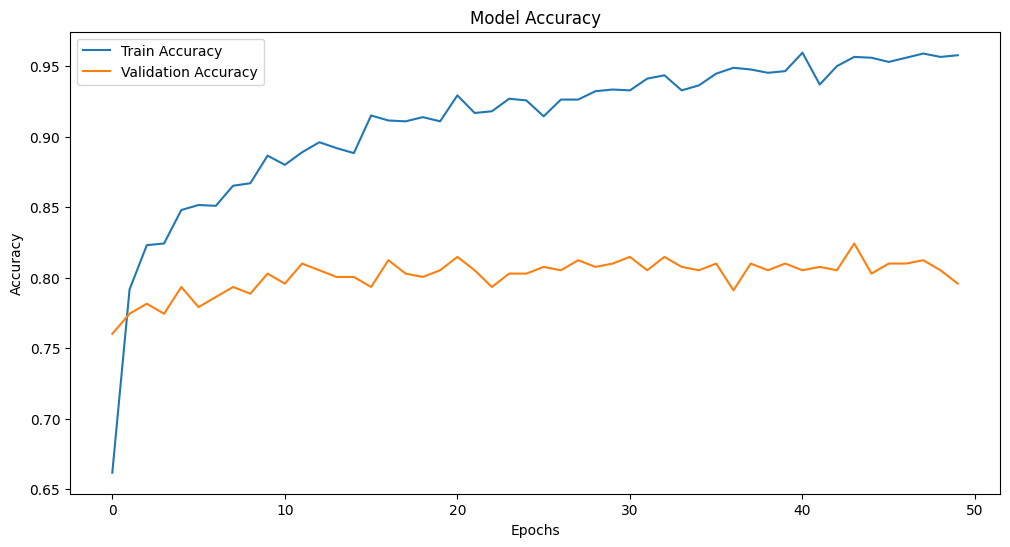

In [16]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Interactive prediction (example)
def predict_symptoms_gradio(*input_features):
    input_data = np.array(input_features).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return "Parkinson's Detected" if prediction > 0.5 else "No Parkinson's Detected"

In [18]:
# Example usage of prediction
test_input = X_test[0]  # Replace with actual input data
result = predict_symptoms_gradio(*test_input) # Changed to the defined function name
print(f'Prediction: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Parkinson's Detected


In [22]:
import joblib
joblib.dump(model, 'parkinsons_model.joblib')

['parkinsons_model.joblib']

In [19]:
# Create Gradio interface
feature_names = X.columns.tolist()
inputs = [gr.Number(label=feature) for feature in feature_names]
output = gr.Textbox(label="Prediction")

gui = gr.Interface(fn=predict_symptoms_gradio, inputs=inputs, outputs=output,
                    title="Parkinson's Disease Prediction",
                    description="Masukkan nilai untuk setiap fitur dan dapatkan prediksi apakah individu memiliki Parkinson.")

In [20]:
# Launch the interface
gui.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fe876c21cdd83affdb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


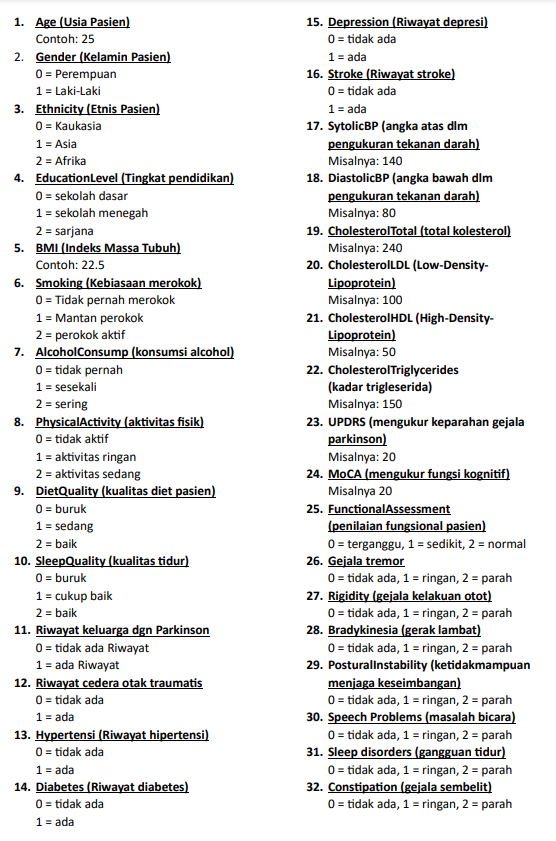